In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

<a id='1'></a><br>
# Load and Check Data

In [2]:
all_0 = "C-NMC_Leukemia/training_data/fold_0/all"
all_1 = "C-NMC_Leukemia/training_data/fold_1/all"
all_2 = "C-NMC_Leukemia/training_data/fold_2/all"

hem_0 = "C-NMC_Leukemia/training_data/fold_0/hem"
hem_1 = "C-NMC_Leukemia/training_data/fold_1/hem"
hem_2 = "C-NMC_Leukemia/training_data/fold_2/hem"

In [3]:
def get_path_image(folder):
    image_paths = []
    image_fnames = os.listdir(folder) 
    for img_id in range(len(image_fnames)):
        img = os.path.join(folder,image_fnames[img_id])
        image_paths.append(img)
    
    return image_paths

In [4]:
img_data = []

for i in [all_0,all_1,all_2,hem_0,hem_1,hem_2]:
    paths = get_path_image(i)
    img_data.extend(paths)
print(len(img_data))


10661


In [5]:
data = {"img_data":img_data,
        "labels":[np.nan for x in range(len(img_data))]}

data = pd.DataFrame(data) 
print(data["img_data"])



0        C-NMC_Leukemia/training_data/fold_0/all/UID_20...
1        C-NMC_Leukemia/training_data/fold_0/all/UID_4_...
2        C-NMC_Leukemia/training_data/fold_0/all/UID_45...
3        C-NMC_Leukemia/training_data/fold_0/all/UID_28...
4        C-NMC_Leukemia/training_data/fold_0/all/UID_35...
                               ...                        
10656    C-NMC_Leukemia/training_data/fold_2/hem/UID_H5...
10657    C-NMC_Leukemia/training_data/fold_2/hem/UID_h3...
10658    C-NMC_Leukemia/training_data/fold_2/hem/UID_H4...
10659    C-NMC_Leukemia/training_data/fold_2/hem/UID_H5...
10660    C-NMC_Leukemia/training_data/fold_2/hem/UID_H2...
Name: img_data, Length: 10661, dtype: object


In [6]:
data["labels"][0:7272] = 1 # ALL
data["labels"][7272:10661] = 0 # HEM

/var/folders/bz/cwpxfbpn249f6s6tyxm74tdm0000gn/T/ipykernel_4701/2481703241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"][0:7272] = 1 # ALL
/var/folders/bz/cwpxfbpn249f6s6tyxm74tdm0000gn/T/ipykernel_4701/2481703241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"][7272:10661] = 0 # HEM


In [7]:
data["labels"] = data["labels"].astype("int64")

<a id='2'></a><br>
# Crop Black Edges In Image

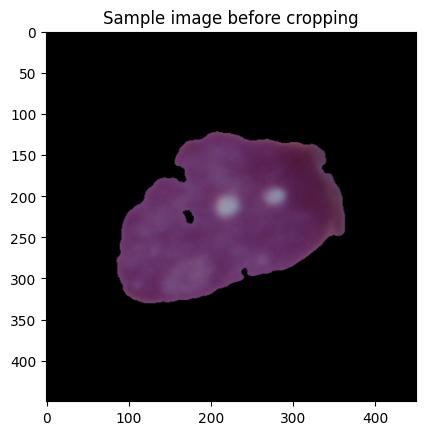

In [8]:
image = cv.imread(data["img_data"][1000])
plt.imshow(image)
plt.title("Sample image before cropping")
plt.show()

In [9]:
img_list = []

for i in range(len(img_data)):
    image = cv.imread(data["img_data"][i])
    print(image)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] 
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    crop_img = image[mnx:mxx,mny:mxy,:]
    crop_img_r = cv.resize(crop_img, (224,224))
    img_list.append(crop_img_r)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


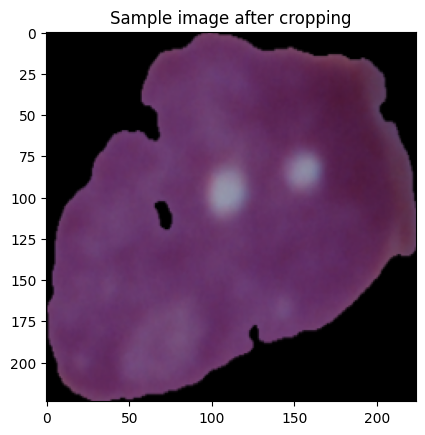

In [10]:
plt.imshow(img_list[1000])
plt.title("Sample image after cropping")
plt.show()

 Feature Extraction with  ResNet50 or ResNet101

In [11]:
from tensorflow.keras.applications import ResNet50, ResNet101

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input

In [12]:
def feature_extract(model):
   
    if model == "ResNet50": model = ResNet50(weights='imagenet',include_top=False,pooling="avg")
    elif model == "ResNet101": model = ResNet101(weights='imagenet',include_top=False,pooling="avg")
    return modelg

In [13]:
model = feature_extract("ResNet50") 

In [18]:
features_list = []
for i in range(len(img_list)):
            
    image = img_list[i].reshape(-1, 224, 224, 3)
    image = preprocess_input(image)

   
    features = model.predict(image).reshape(2048,)
    
    features_list.append(features)

1/1 [==============================] - 0s 128ms/step


In [19]:
features_df = pd.DataFrame(features_list)

In [20]:
features_df["labels"] = data["labels"]

In [21]:
x = features_df.drop(['labels'], axis = 1)
y = features_df.loc[:,"labels"].values

In [22]:
x

0         1         2         3         4         5         6     \
0      5.754799  0.000000  0.000000  0.053207  0.120210  0.000691  0.198149   
1      6.565031  0.000000  0.009847  0.000000  0.095139  0.000000  0.380625   
2      7.893048  0.055400  0.004366  0.257745  0.000000  0.101906  0.066694   
3      4.458643  0.053564  0.000000  0.169446  0.000000  0.023006  0.153901   
4      3.437567  0.077924  0.000000  0.200156  0.000000  0.000000  0.164938   
...         ...       ...       ...       ...       ...       ...       ...   
10656  4.449837  0.000000  0.000000  0.299330  0.006914  0.003976  0.396513   
10657  4.569850  0.064214  0.000000  0.042587  0.005378  0.034710  0.152583   
10658  5.616341  0.000000  0.040078  0.100921  0.032985  0.000000  0.036374   
10659  6.131824  0.070576  0.018195  0.145650  0.000000  0.081659  0.102782   
10660  4.023552  0.006262  0.000000  0.062833  0.007052  0.000000  0.102651   

           7         8         9     ...      2038      2039      2040  \
0      0.010828  0.026760  0.016534  ...  0.252131  0.037179  0.020424   
1      0.000000  0.004703  0.149181  ...  1.071616  0.000000  0.174245   
2      0.000000  0.079069  0.020498  ...  0.215942  0.096398  0.000000   
3      0.000000  0.016875  0.006660  ...  0.681389  0.000649  0.021230   
4      0.000000  0.000000  0.014261  ...  0.063306  0.000000  0.045268   
...         ...       ...       ...  ...       ...       ...       ...   
10656  0.072232  0.000000  0.003048  ...  0.788215  0.005840  0.171687   
10657  0.000000  0.000000  0.000000  ...  0.144409  0.062732  0.009822   
10658  0.000000  0.105434  0.033254  ...  0.234441  0.006749  0.000000   
10659  0.000231  0.000000  0.009673  ...  0.147157  0.000000  0.000000   
10660  0.000000  0.003641  0.063856  ...  0.186947  0.000000  0.072088   

           2041      2042      2043      2044      2045      2046      2047  
0      0.590208  0.000000  0.000000  0.233206  0.317428  0.069460  2.108654  
1      0.846332  0.043656  0.000000  0.380931  0.095345  0.237909  1.449636  
2      0.719796  0.114601  0.060360  0.478257  0.641945  0.712658  1.395812  
3      0.052953  0.232713  0.000000  0.563538  1.069322  0.005108  1.383029  
4      0.171814  0.000000  0.000000  0.102497  1.818493  0.033179  2.127112  
...         ...       ...       ...       ...       ...       ...       ...  
10656  0.305403  0.000000  0.000000  0.228283  0.583413  0.173623  2.650010  
10657  0.234111  0.000000  0.000000  0.141402  0.903295  0.072230  1.941057  
10658  0.245717  0.064133  0.003203  0.123961  0.530486  0.262547  0.716371  
10659  0.219745  0.130823  0.041557  0.191389  1.426324  0.350766  1.685725  
10660  0.390320  0.025530  0.000000  0.180035  0.054911  0.001638  1.292873  

[10661 rows x 2048 columns]

In [23]:
print(f"Number of features before feature selection: {x.shape[1]}")

Number of features before feature selection: 2048


In [24]:
y

array([1, 1, 1, ..., 0, 0, 0])

<a id='4'></a><br>
# Data Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_ = scaler.transform(x)

In [26]:
x_ = pd.DataFrame(x_)

<a id='5'></a><br>
# Feature Selection Methods

<a id='7'></a><br>
## Recursive Feature Elimination (RFE)

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

def RFE_fs():
    rfe_selector = RFE(estimator=RandomForestClassifier())
    rfe_selector.fit(x_, y)
    
    rfe_support = rfe_selector.get_support()
    rfe_feature = x_.loc[:,rfe_support].columns.tolist()
    
    rfe_x = x_[rfe_feature]
    return rfe_x

<a id='8'></a><br>
## Random Forest

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def rf_fs():
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=5), threshold='1.25*median')
    embeded_rf_selector.fit(x, y)
    
    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
    
    rf_x = x[embeded_rf_feature]
    return rf_x

In [29]:
fs_x = rf_fs() 

In [30]:
print(f"Number of features after feature selection: {fs_x.shape[1]}")

Number of features after feature selection: 605


<a id='9'></a><br>
# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fs_x, y, test_size = 0.2, random_state = 42)

<a id='10'></a><br>
# Classification with ML Algorithms

In [32]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV

<a id='12'></a><br>
## SVM

In [33]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}
 
SVM_grid = GridSearchCV(svm.SVC(), param_grid_svm, cv=5)
SVM_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']})

In [35]:
print(SVM_grid.best_params_)
 
print(SVM_grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [36]:
svm_clf = svm.SVC(C=100, gamma=0.01, kernel='rbf')
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.902


In [37]:
p=precision_score(y_test, predicted) 
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted) 
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted) 
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted') 
print('weighted f1-score: %.3f' % (f1_w))

precision : 0.911
recall : 0.948
f1-score: 0.929
weighted f1-score: 0.900


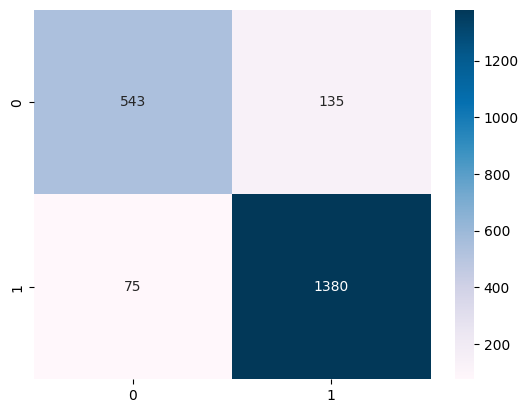

In [38]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()

<a id='13'></a><br>
## Random Forest

In [39]:
param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8]}

RF_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv= 5)
RF_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 500]})

In [40]:
print(RF_grid.best_params_)

{'max_depth': 8, 'n_estimators': 200}


In [41]:
r_forest = RandomForestClassifier(500,max_depth=8, random_state=5)
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.827


In [42]:
p=precision_score(y_test, predicted) 
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted) 
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted) 
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted') 
print('weighted f1-score: %.3f' % (f1_w))

precision : 0.822
recall : 0.953
f1-score: 0.883
weighted f1-score: 0.816


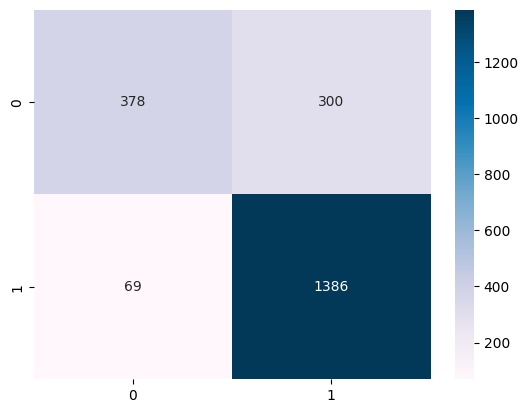

In [43]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()

<a id='14'></a><br>
## Naive Bayes

In [44]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
predicted = nb_model.predict(x_test)
score = nb_model.score(x_test, y_test)
nb_score_ = np.mean(score)

print('Accuracy : %.3f' % (nb_score_))

Accuracy : 0.759


In [ ]:
p=precision_score(y_test, predicted) 
print('precision : %.3f' % (p))

r=recall_score(y_test, predicted) 
print('recall : %.3f' % (r))

f1=f1_score(y_test, predicted) 
print('f1-score: %.3f' % (f1))

f1_w=f1_score(y_test, predicted, average='weighted') 
print('weighted f1-score: %.3f' % (f1_w))

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(cf_matrix, cmap="PuBu", annot=True, fmt='.0f')
plt.show()